In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.patches as mpatches

pd.options.display.max_rows = 1000

In [2]:
def getData (filename):
    data = pd.read_csv(filename, names=['method', 'file', 'status', 'inf_input', 'quant_input', 'cuts_in', 'inf_output', 
                                        'quant_output', 'termset', 'mingrammar', 'num_mingrammars', 'can_sol', 'min_sol', 
                                        'time_termset', 'time_dtable', 'time_grammar', 'time_minsol', 'time_proof', 
                                        'time_cleanproof'])
    data = data.replace(" ", -1)
    data = data.replace(-1, np.nan)
    data = data.replace('-1', np.nan)
    
    # Setting the correct datatypes
    columns = set(data.keys())
    integer_columns = [c for c in columns if c not in ['method', 'file', 'status']]
    for c in integer_columns:
        data[c] = data[c].astype(np.float)   
    data['method'] = data['method'].astype(str)
    data['file'] = data['file'].astype(str)
    data['status'] = data['status'].astype(str)
    
    # Adding a column for the database
    def getDB (s):
        if 'ExampleProof' in s:
            return 0
        elif 'testing/TSTP' in s:
            return 1
        elif 'testing/veriT' in s:
            return 2
        else:
            return -1
    data['db'] = data.file.apply(getDB)
    
    return data

In [3]:
filename = "CutIntroDataLog.txt"
data = getData(filename)

In [4]:
# Other exceptions (aka bugs to hunt)

data_other_exp = data[data.status == 'cutintro_other_exception']
print(data_other_exp.shape)
data_other_exp[['method', 'file', 'status']]

(435, 20)


,method,file,status
62,one_cut_one_quant,SumOfOnesExampleProof(1),cutintro_other_exception
135,one_cut_many_quant,SumOfOnesExampleProof(1),cutintro_other_exception
226,many_cuts_one_quant_1,SumOfOnesExampleProof(1),cutintro_other_exception
291,many_cuts_one_quant_2,SumOfOnesExampleProof(1),cutintro_other_exception
830,one_cut_one_quant,testing/TSTP/prover9/SWV/SWV463+1/Prover9---11...,cutintro_other_exception
1060,one_cut_one_quant,testing/TSTP/prover9/SWW/SWW208+1/Prover9---11...,cutintro_other_exception
1233,one_cut_one_quant,testing/TSTP/prover9/NUM/NUM926+6/Prover9---11...,cutintro_other_exception
1583,one_cut_one_quant,testing/TSTP/prover9/SWW/SWW207+1/Prover9---11...,cutintro_other_exception
1634,one_cut_one_quant,testing/TSTP/prover9/LCL/LCL153-1/Prover9---11...,cutintro_other_exception
3104,one_cut_one_quant,testing/TSTP/prover9/LCL/LCL155-1/Prover9---11...,cutintro_other_exception


In [5]:
# Test that are ok in one_cut_one_quantifier and fail for many_cuts_one_quantifier_1

data_ocoq = data[data.method == 'one_cut_one_quant']
data_mcoq1 = data[data.method == 'many_cuts_one_quant_1']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcoq1'))

diff = merged[(merged.status_ocoq == 'ok') & (merged.status_mcoq1 != 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcoq1']]

(64, 39)


,file,status_ocoq,status_mcoq1
71,UniformAssociativity3ExampleProof(3),ok,grammar_finding_timeout
92,testing/TSTP/prover9/GEO/GEO070-3/Prover9---11...,ok,grammar_finding_timeout
181,testing/TSTP/prover9/RNG/RNG019-7/Prover9---11...,ok,grammar_finding_timeout
189,testing/TSTP/prover9/RNG/RNG021-7/Prover9---11...,ok,grammar_finding_timeout
199,testing/TSTP/prover9/LCL/LCL196-3/Prover9---11...,ok,grammar_finding_timeout
260,testing/TSTP/prover9/COL/COL006-2/Prover9---11...,ok,grammar_finding_timeout
303,testing/TSTP/prover9/LCL/LCL241-3/Prover9---11...,ok,grammar_finding_timeout
377,testing/TSTP/prover9/LCL/LCL193-3/Prover9---11...,ok,grammar_finding_timeout
408,testing/TSTP/prover9/LAT/LAT032-1/Prover9---11...,ok,grammar_finding_timeout
410,testing/TSTP/prover9/GRP/GRP647+1/Prover9---11...,ok,grammar_finding_timeout


In [6]:
# Test that are ok in many_cuts_one_quantifier_1 and fail for one_cut_one_quantifier

data_ocoq = data[data.method == 'one_cut_one_quant']
data_mcoq1 = data[data.method == 'many_cuts_one_quant_1']

merged = pd.merge(data_ocoq, data_mcoq1, on=['file'], suffixes=('_ocoq', '_mcmq1'))

diff = merged[(merged.status_ocoq != 'ok') & (merged.status_mcmq1 == 'ok')]
print(diff.shape)
diff[['file','status_ocoq', 'status_mcmq1']]

(1807, 39)


,file,status_ocoq,status_mcmq1
0,LinearExampleProof(1),cutintro_uncompressible,ok
1,LinearExampleProof(2),cutintro_uncompressible,ok
2,LinearExampleProof(3),cutintro_uncompressible,ok
12,LinearExampleProof(13),prcons_timeout,ok
13,SquareDiagonalExampleProof(1),cutintro_uncompressible,ok
23,SquareDiagonalExampleProof(11),prcons_timeout,ok
24,SquareEdgesExampleProof(1),cutintro_uncompressible,ok
31,SquareEdgesExampleProof(8),prcons_timeout,ok
32,SquareEdges2DimExampleProof(1),cutintro_uncompressible,ok
33,SquareEdges2DimExampleProof(2),cutintro_uncompressible,ok


In [7]:
# Regressions compared to previous test

previous_filename = "../2015-02-10/CutIntroDataLog.txt"
previous_data = getData(previous_filename)

merged = pd.merge(data, previous_data, on=['method', 'file'])
#merged.head(0)

regression = merged[(merged.status_y == 'ok') & (merged.status_x != 'ok')]
#regression.head(0)
print(regression.shape)

regression_delta = regression[(regression.method == 'one_cut_one_quant') | (regression.method == 'one_cut_many_quant')]
print(regression_delta.shape)
#regression_delta.head(0)

regression_maxsat = regression[((regression.method == 'many_cuts_one_quant_1') | (regression.method == 'many_cuts_one_quant_2')) ]
print(regression_maxsat.shape)
#regression_maxsat.head(0)

regression[['method', 'file', 'status_x', 'status_y']]

(0, 38)
(0, 38)
(0, 38)


,method,file,status_x,status_y


In [8]:
# Separating data by method and database
data_ocoq_examples = data[(data.method == 'one_cut_one_quant') & (data.db == 0)]
data_ocoq_prover9 = data[(data.method == 'one_cut_one_quant') & (data.db == 1)]
data_ocoq_verit = data[(data.method == 'one_cut_one_quant') & (data.db == 2)]
data_ocmq_examples = data[(data.method == 'one_cut_many_quant') & (data.db == 0)]
data_ocmq_prover9 = data[(data.method == 'one_cut_many_quant') & (data.db == 1)]
data_ocmq_verit = data[(data.method == 'one_cut_many_quant') & (data.db == 2)]
data_mcoq1_examples = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 0)]
data_mcoq1_prover9 = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 1)]
data_mcoq1_verit = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 2)]
data_mcoq2_examples = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 0)]
data_mcoq2_prover9 = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 1)]
data_mcoq2_verit = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 2)]

print("=== Number of tests per database and method:\n")

print("Proof examples - one cut one quantifier:", data_ocoq_examples.shape[0])
print("Proof examples - one cut many quantifiers:", data_ocmq_examples.shape[0])
print("Proof examples - many (1) cuts one quantifier:", data_mcoq1_examples.shape[0])
print("Proof examples - many (2) cuts one quantifier:", data_mcoq1_examples.shape[0])
print()

print("Prover9 - one cut one quantifier:", data_ocoq_prover9.shape[0])
print("Prover9 - one cut many quantifiers:", data_ocmq_prover9.shape[0])
print("Prover9 - many (1) cuts one quantifier:", data_mcoq1_prover9.shape[0])
print("Prover9 - many (2) cuts one quantifier:", data_mcoq1_prover9.shape[0])
print()

print("VeriT - one cut one quantifier:", data_ocoq_verit.shape[0])
print("VeriT - one cut many quantifiers:", data_ocmq_verit.shape[0])
print("VeriT - many (1) cuts one quantifier:", data_mcoq1_verit.shape[0])
print("VeriT - many (2) cuts one quantifier:", data_mcoq1_verit.shape[0])
print()

=== Number of tests per database and method:

Proof examples - one cut one quantifier: 73
Proof examples - one cut many quantifiers: 73
Proof examples - many (1) cuts one quantifier: 90
Proof examples - many (2) cuts one quantifier: 90

Prover9 - one cut one quantifier: 2909
Prover9 - one cut many quantifiers: 2909
Prover9 - many (1) cuts one quantifier: 2909
Prover9 - many (2) cuts one quantifier: 2909

VeriT - one cut one quantifier: 142
VeriT - one cut many quantifiers: 142
VeriT - many (1) cuts one quantifier: 142
VeriT - many (2) cuts one quantifier: 142



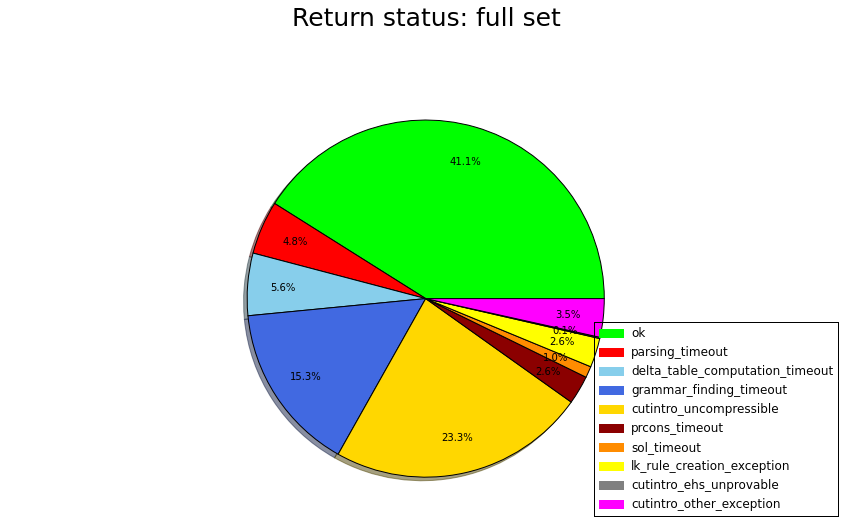

In [9]:
status = data.groupby(['status']).size()

labellst = ['ok', 
            'parsing_timeout', 
            'delta_table_computation_timeout',
            'grammar_finding_timeout',
            'cutintro_uncompressible',
            'prcons_timeout',
            'sol_timeout',
            'lk_rule_creation_exception',
            'cutintro_ehs_unprovable',
            'cutintro_other_exception'
            ]

colorlst = ['lime',
            'red',
            'skyblue',
            'royalblue',
            'gold',
            'darkred',
            'darkorange',
            'yellow',
            'gray',
            'fuchsia'
            ]

values = [status[l] if l in status else 0 for l in labellst]

handles = [mpatches.Patch(color=c, label=l) for c, l in zip(colorlst, labellst)]

plt.figure(figsize=(15,8))
plt.axis('equal')
plt.pie(values, autopct='%1.1f%%', shadow=True, colors=colorlst, radius=1.0, pctdistance=0.8)
plt.title("Return status: full set", size=25, y=1.1)
plt.legend(handles, labellst, loc = 'lower right')

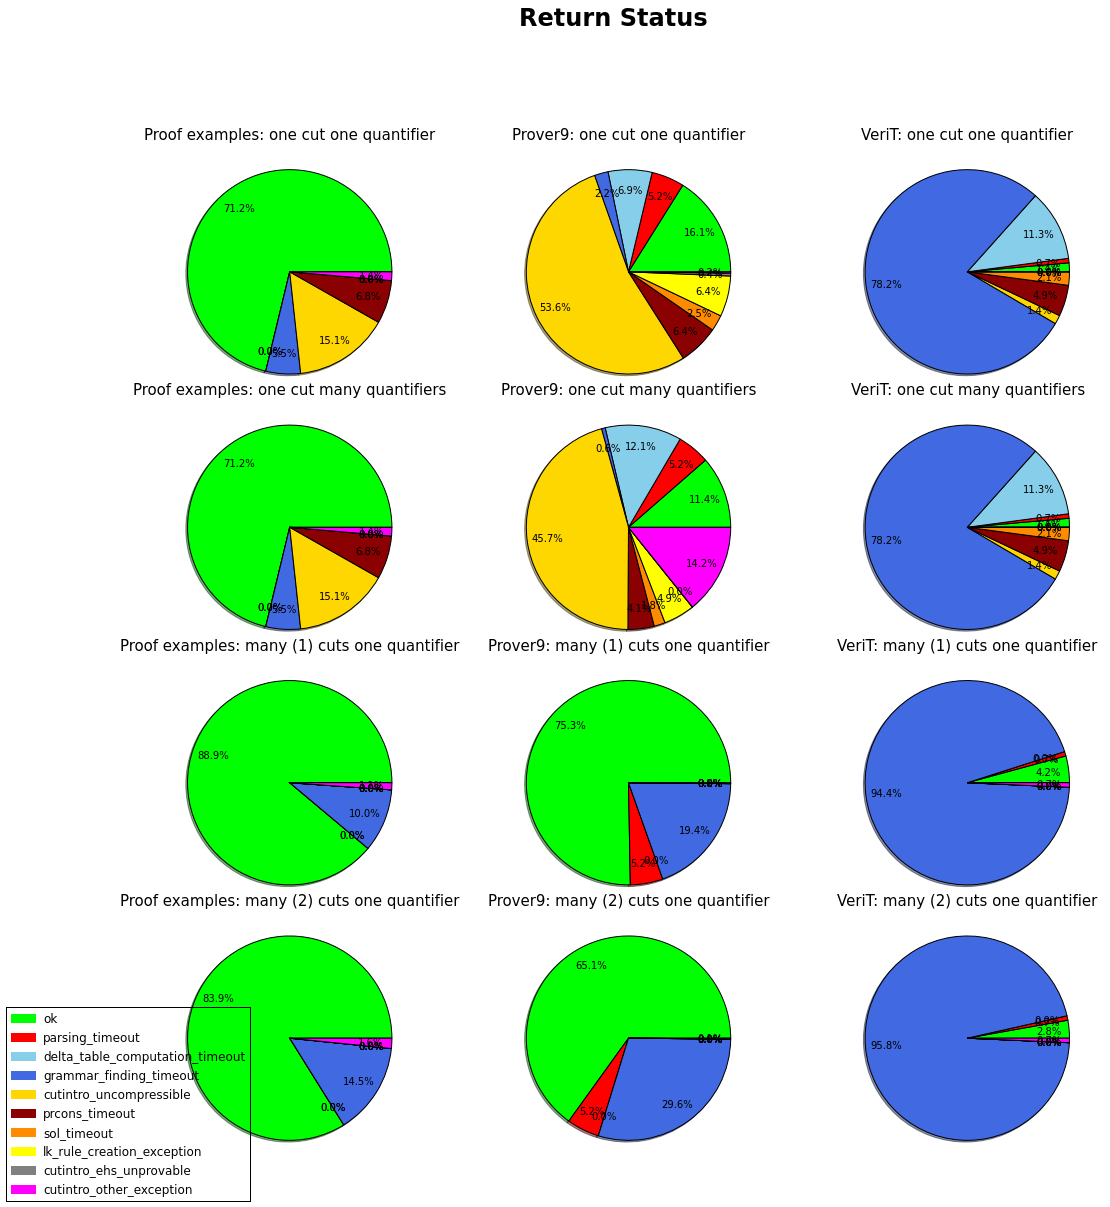

In [10]:
status_ocoq_examples = data_ocoq_examples.groupby(['status']).size()
status_ocmq_examples = data_ocmq_examples.groupby(['status']).size()
status_mcoq1_examples = data_mcoq1_examples.groupby(['status']).size()
status_mcoq2_examples = data_mcoq2_examples.groupby(['status']).size()

status_ocoq_prover9 = data_ocoq_prover9.groupby(['status']).size()
status_ocmq_prover9 = data_ocmq_prover9.groupby(['status']).size()
status_mcoq1_prover9 = data_mcoq1_prover9.groupby(['status']).size()
status_mcoq2_prover9 = data_mcoq2_prover9.groupby(['status']).size()

status_ocoq_verit = data_ocoq_verit.groupby(['status']).size()
status_ocmq_verit = data_ocmq_verit.groupby(['status']).size()
status_mcoq1_verit = data_mcoq1_verit.groupby(['status']).size()
status_mcoq2_verit = data_mcoq2_verit.groupby(['status']).size()

def getValues (status):
    return [status[l] if l in status else 0 for l in labellst]

plt.figure(1, figsize=(17,17))
plt.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
plt.figlegend(handles, labellst, loc='lower left')
plt.suptitle("Return Status", fontsize=24, fontweight='bold')

# LINE 1: one cut one quantifier
plt.subplot(4, 3, 1)
plt.axis('equal')
plt.pie(getValues(status_ocoq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 2)
plt.axis('equal')
plt.pie(getValues(status_ocoq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 3)
plt.axis('equal')
plt.pie(getValues(status_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut one quantifier", size=15, y=1.1)

# LINE 2: one cut many quantifiers
plt.subplot(4, 3, 4)
plt.axis('equal')
plt.pie(getValues(status_ocmq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 5)
plt.axis('equal')
plt.pie(getValues(status_ocmq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 6)
plt.axis('equal')
plt.pie(getValues(status_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut many quantifiers", size=15, y=1.1)

# LINE 3: many (1) cuts one quantifier
plt.subplot(4, 3, 7)
plt.axis('equal')
plt.pie(getValues(status_mcoq1_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 8)
plt.axis('equal')
plt.pie(getValues(status_mcoq1_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 9)
plt.axis('equal')
plt.pie(getValues(status_mcoq1_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (1) cuts one quantifier", size=15, y=1.1)

# LINE 4: many (2) cuts one quantifier
plt.subplot(4, 3, 10)
plt.axis('equal')
plt.pie(getValues(status_mcoq2_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 11)
plt.axis('equal')
plt.pie(getValues(status_mcoq2_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 12)
plt.axis('equal')
plt.pie(getValues(status_mcoq2_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (2) cuts one quantifier", size=15, y=1.1)

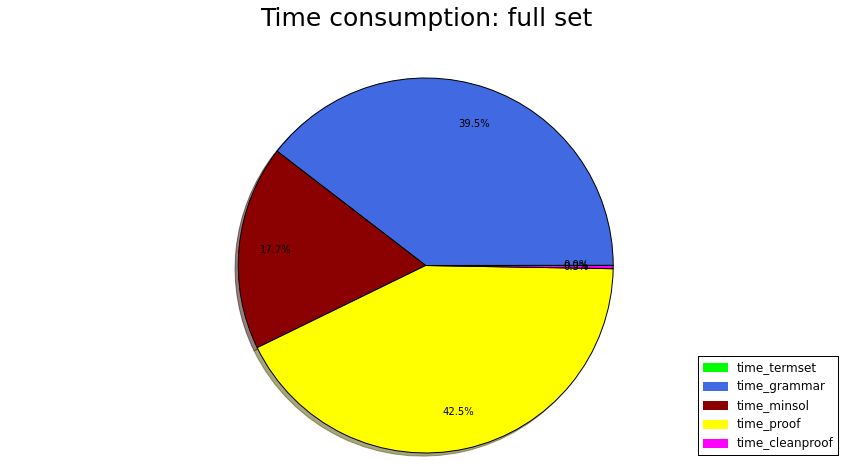

In [11]:
timecols = ['time_termset', 'time_grammar', 'time_minsol', 'time_proof', 'time_cleanproof']
times = []
def getTimes (data):
    times = []
    for c in timecols:
        times.append(data[c].mean())
    return times

times = pd.Series(getTimes(data), index=timecols)

colorlst = ['lime',
            'royalblue',
            'darkred',
            'yellow',
            'fuchsia'
            ]

values = [times[t] for t in timecols]

handles = [mpatches.Patch(color=c, label=t) for c, t in zip(colorlst, timecols)]

plt.figure(figsize=(15,7))
plt.axis('equal')
plt.pie(values, autopct='%1.1f%%', shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Time consumption: full set", size=25, y=1.1)
plt.legend(handles, timecols, loc = 'lower right')

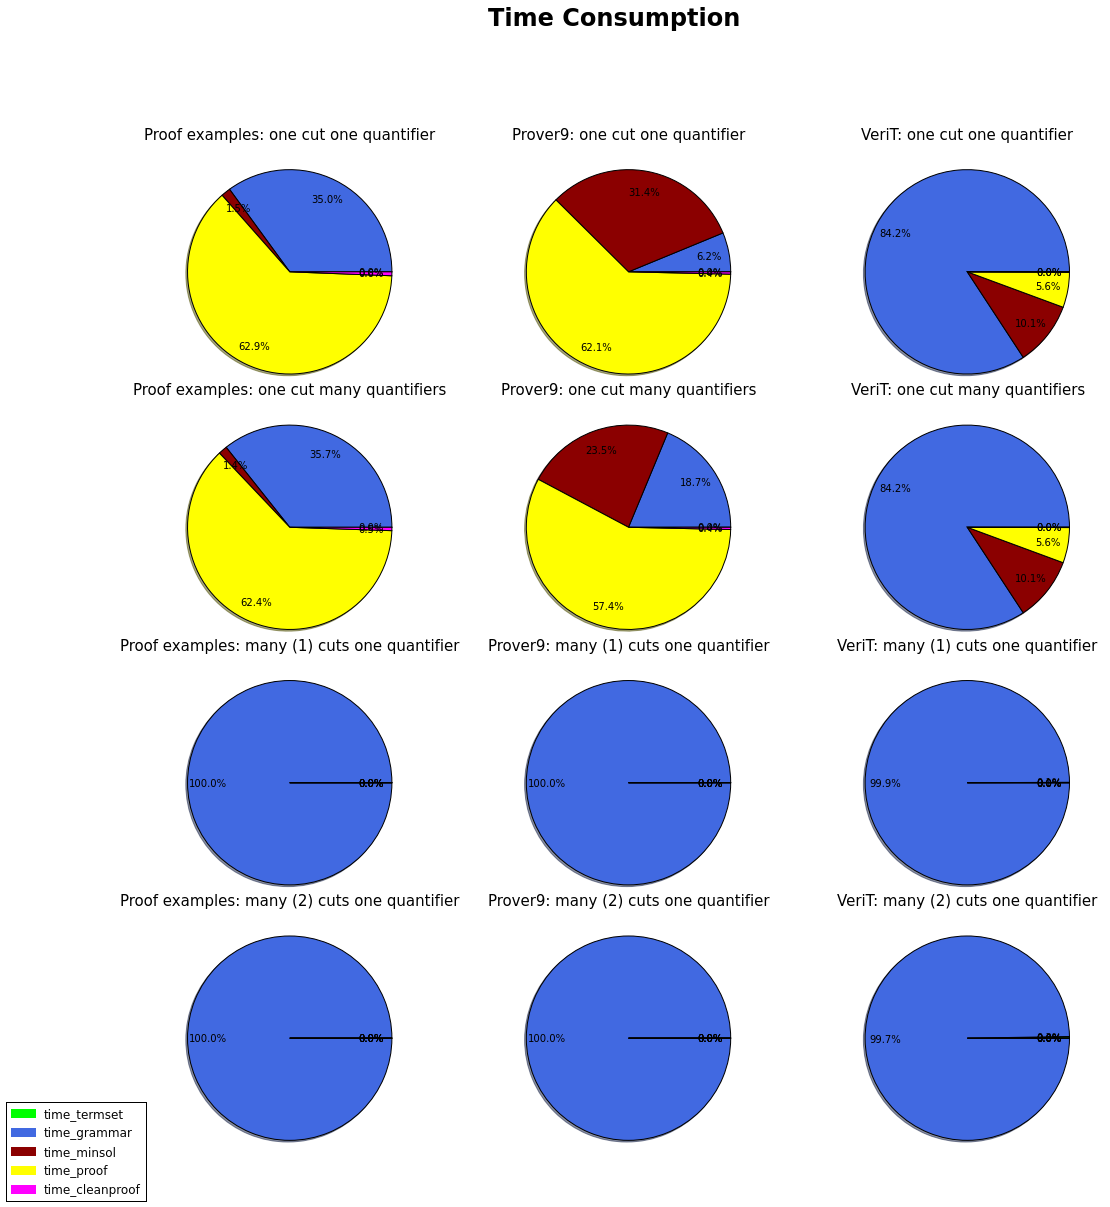

In [12]:
def getTimeValues (data):
    times = pd.Series(getTimes(data), index=timecols).replace(np.nan, 0)
    return [times[t] if t in times else 0 for t in timecols]

plt.figure(1, figsize=(17,17))
plt.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
plt.figlegend(handles, timecols, loc='lower left')
plt.suptitle("Time Consumption", fontsize=24, fontweight='bold')

# LINE 1: one cut one quantifier
plt.subplot(4, 3, 1)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 2)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 3)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut one quantifier", size=15, y=1.1)

# LINE 2: one cut many quantifiers
plt.subplot(4, 3, 4)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 5)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 6)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut many quantifiers", size=15, y=1.1)

# LINE 3: many (1) cuts one quantifier
plt.subplot(4, 3, 7)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 8)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 9)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (1) cuts one quantifier", size=15, y=1.1)

# LINE 4: many (2) cuts one quantifier
plt.subplot(4, 3, 10)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_examples), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 11)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_prover9), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 12)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_verit), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (2) cuts one quantifier", size=15, y=1.1)

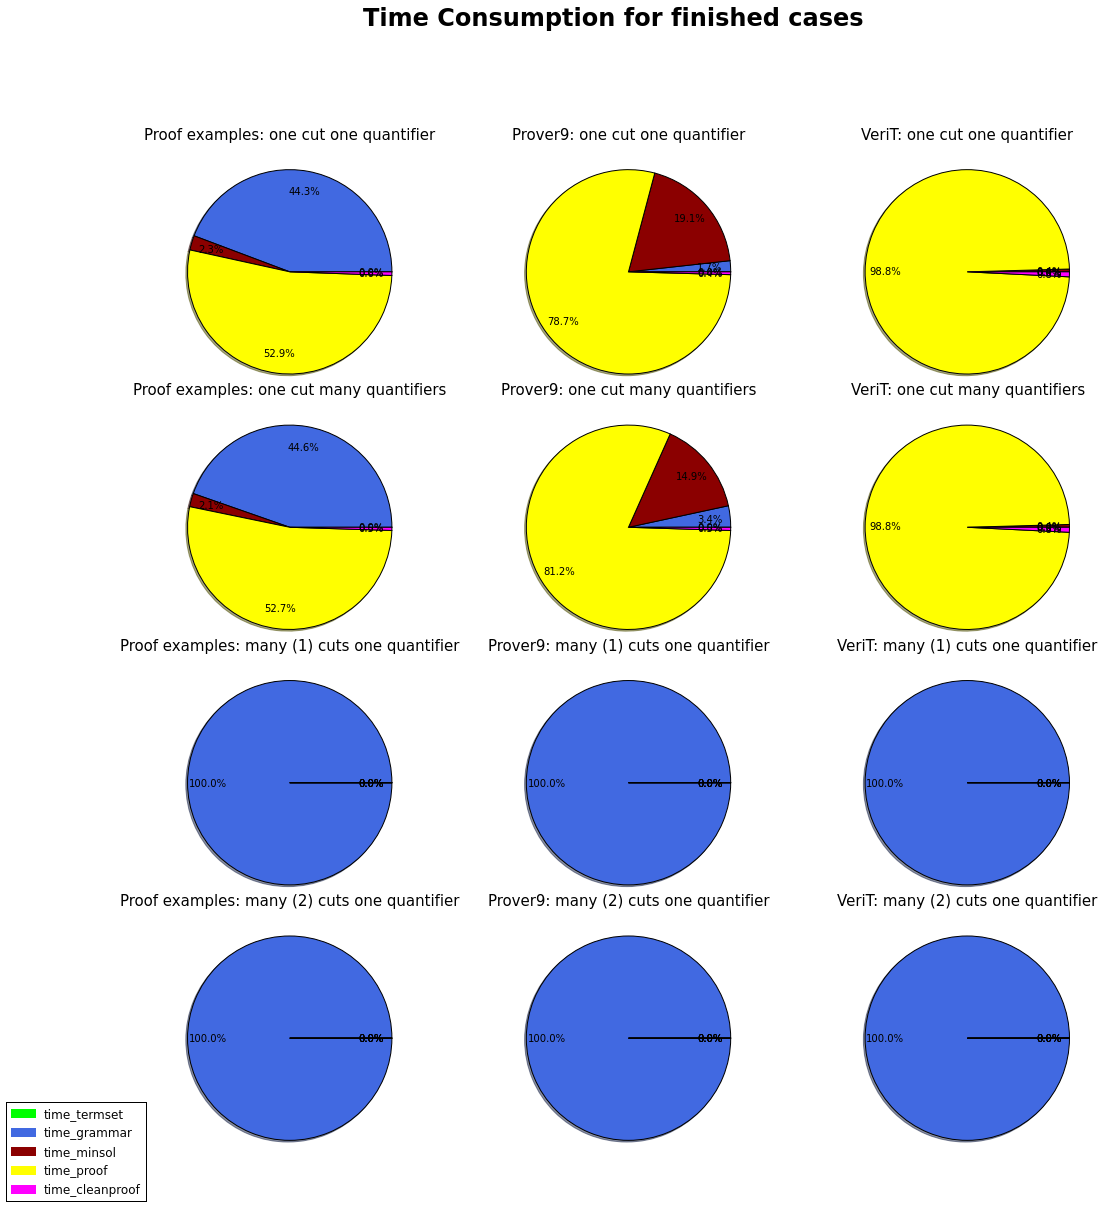

In [13]:
# Separating data by method and database (ok examples)
data_ocoq_examples_ok = data[(data.method == 'one_cut_one_quant') & (data.db == 0) & (data.status == 'ok')]
data_ocoq_prover9_ok = data[(data.method == 'one_cut_one_quant') & (data.db == 1) & (data.status == 'ok')]
data_ocoq_verit_ok = data[(data.method == 'one_cut_one_quant') & (data.db == 2) & (data.status == 'ok')]
data_ocmq_examples_ok = data[(data.method == 'one_cut_many_quant') & (data.db == 0) & (data.status == 'ok')]
data_ocmq_prover9_ok = data[(data.method == 'one_cut_many_quant') & (data.db == 1) & (data.status == 'ok')]
data_ocmq_verit_ok = data[(data.method == 'one_cut_many_quant') & (data.db == 2) & (data.status == 'ok')]
data_mcoq1_examples_ok = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 0) & (data.status == 'ok')]
data_mcoq1_prover9_ok = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 1) & (data.status == 'ok')]
data_mcoq1_verit_ok = data[(data.method == 'many_cuts_one_quant_1') & (data.db == 2) & (data.status == 'ok')]
data_mcoq2_examples_ok = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 0) & (data.status == 'ok')]
data_mcoq2_prover9_ok = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 1) & (data.status == 'ok')]
data_mcoq2_verit_ok = data[(data.method == 'many_cuts_one_quant_2') & (data.db == 2) & (data.status == 'ok')]

plt.figure(1, figsize=(17,17))
plt.subplots_adjust(wspace=0.25, hspace=0.20, top=0.85, bottom=0.05)
plt.figlegend(handles, timecols, loc='lower left')
plt.suptitle("Time Consumption for finished cases", fontsize=24, fontweight='bold')

# LINE 1: one cut one quantifier
plt.subplot(4, 3, 1)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 2)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 3)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut one quantifier", size=15, y=1.1)

# LINE 2: one cut many quantifiers
plt.subplot(4, 3, 4)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 5)
plt.axis('equal')
plt.pie(getTimeValues(data_ocmq_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: one cut many quantifiers", size=15, y=1.1)

plt.subplot(4, 3, 6)
plt.axis('equal')
plt.pie(getTimeValues(data_ocoq_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: one cut many quantifiers", size=15, y=1.1)

# LINE 3: many (1) cuts one quantifier
plt.subplot(4, 3, 7)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 8)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (1) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 9)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq1_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (1) cuts one quantifier", size=15, y=1.1)

# LINE 4: many (2) cuts one quantifier
plt.subplot(4, 3, 10)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_examples_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Proof examples: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 11)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_prover9_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("Prover9: many (2) cuts one quantifier", size=15, y=1.1)

plt.subplot(4, 3, 12)
plt.axis('equal')
plt.pie(getTimeValues(data_mcoq2_verit_ok), autopct='%1.1f%%', 
        shadow=True, colors=colorlst, radius=1.2, pctdistance=0.8)
plt.title("VeriT: many (2) cuts one quantifier", size=15, y=1.1)

In [14]:
# For Daniel
more_than_one_cut = data[(data.cuts_in > 1)]
print(more_than_one_cut.shape)
more_than_one_cut

(572, 20)


,method,file,status,inf_input,quant_input,cuts_in,inf_output,quant_output,termset,mingrammar,num_mingrammars,can_sol,min_sol,time_termset,time_dtable,time_grammar,time_minsol,time_proof,time_cleanproof,db
255,many_cuts_one_quant_2,SquareDiagonalExampleProof(7),ok,54,28,2,NaN,NaN,14,8,NaN,NaN,NaN,0,NaN,16205,NaN,NaN,NaN,0
262,many_cuts_one_quant_2,SquareEdgesExampleProof(5),ok,34,16,2,NaN,NaN,10,7,NaN,NaN,NaN,1,NaN,8889,NaN,NaN,NaN,0
278,many_cuts_one_quant_2,LinearEqExampleProof(7),ok,55,29,2,NaN,NaN,15,9,NaN,NaN,NaN,1,NaN,16989,NaN,NaN,NaN,0
304,one_cut_one_quant,testing/TSTP/prover9/SWV/SWV480+1/Prover9---11...,ok,263,33,32,231,27,22,22,2,10,5,1,1,1,27,2551,17,1
318,one_cut_one_quant,testing/TSTP/prover9/GEO/GEO070-3/Prover9---11...,ok,935,139,164,866,146,37,37,1,13,13,1,4,4,5,3588,18,1
325,one_cut_one_quant,testing/TSTP/prover9/GRP/GRP729-1/Prover9---11...,ok,87,37,5,484,34,19,17,1,8,4,0,1,1,3367,2982,35,1
338,one_cut_one_quant,testing/TSTP/prover9/KLE/KLE150+2/Prover9---11...,ok,137,24,9,342,12,16,14,1,11,9,1,0,1,29,719,14,1
339,one_cut_one_quant,testing/TSTP/prover9/NUM/NUM574+1/Prover9---11...,ok,277,33,86,430,31,22,22,1,7,7,1,0,1,1,1179,7,1
353,one_cut_one_quant,testing/TSTP/prover9/KLE/KLE035+2/Prover9---11...,ok,136,43,6,114,27,26,19,1,10,6,1,4,9,840,1009,5,1
354,one_cut_one_quant,testing/TSTP/prover9/SEU/SEU340+1/Prover9---11...,ok,540,52,87,416,48,21,21,2,4,2,0,1,1,12,2870,19,1


In [15]:
data['status'].value_counts()

ok                                 5133
cutintro_uncompressible            2915
grammar_finding_timeout            1914
delta_table_computation_timeout     705
parsing_timeout                     605
cutintro_other_exception            435
lk_rule_creation_exception          330
prcons_timeout                      323
sol_timeout                         128
cutintro_ehs_unprovable              14
dtype: int64

Different grammar sizes between different methods:

In [16]:
data[data.mingrammar == data.mingrammar] \
    .groupby('file') \
    .filter(lambda x: len(set(x.mingrammar)) > 1) \
    .sort('file')[['file', 'method', 'mingrammar']]

,file,method,mingrammar
37,SquareEdges2DimExampleProof(6),one_cut_one_quant,11
110,SquareEdges2DimExampleProof(6),one_cut_many_quant,11
193,SquareEdges2DimExampleProof(6),many_cuts_one_quant_1,10
38,SquareEdges2DimExampleProof(7),one_cut_one_quant,13
111,SquareEdges2DimExampleProof(7),one_cut_many_quant,13
194,SquareEdges2DimExampleProof(7),many_cuts_one_quant_1,12
719,testing/TSTP/prover9/ALG/ALG029+1/Prover9---11...,one_cut_one_quant,15
3628,testing/TSTP/prover9/ALG/ALG029+1/Prover9---11...,one_cut_many_quant,12
6537,testing/TSTP/prover9/ALG/ALG029+1/Prover9---11...,many_cuts_one_quant_1,15
9446,testing/TSTP/prover9/ALG/ALG029+1/Prover9---11...,many_cuts_one_quant_2,12
